# Spatial Smoothing


This week we'll be using nilearn's `smooth_img` ([documentation](https://nilearn.github.io/modules/generated/nilearn.image.smooth_img.html#nilearn.image.smooth_img)) from [the image module](https://nilearn.github.io/modules/reference.html#module-nilearn.image) to spatially smooth some of our functional data. 

Note: Unlike previous weeks, all our imports are done at the top of the file. This is convention not just for Python but for many languages (e.g., R, Java). This keeps everything together and puts all of the dependencies up front. 

In [11]:
from pathlib import Path
import nibabel as nib
from nilearn.image import smooth_img, index_img
from nilearn.plotting import plot_anat

In [5]:
func_file = Path('data/sub-08/ses-test/func/sub-08_ses-test_task-fingerfootlips_bold.nii.gz')
func_file = nib.load(func_file)

Next, let's check out `smooth_img`:

In [3]:
smooth_img?

Signature: smooth_img(imgs, fwhm)
Docstring:
Smooth images by applying a Gaussian filter.

Apply a Gaussian filter along the three first dimensions of arr.
In all cases, non-finite values in input image are replaced by zeros.

Parameters
----------
imgs: Niimg-like object or iterable of Niimg-like objects
    See http://nilearn.github.io/manipulating_images/input_output.html
    Image(s) to smooth.

fwhm: scalar, numpy.ndarray, 'fast' or None
    Smoothing strength, as a Full-Width at Half Maximum, in millimeters.
    If a scalar is given, width is identical on all three directions.
    A numpy.ndarray must have 3 elements, giving the FWHM along each axis.
    If fwhm == 'fast', a fast smoothing will be performed with
    a filter [0.2, 1, 0.2] in each direction and a normalisation
    to preserve the scale.
    If fwhm is None, no filtering is performed (useful when just removal
    of non-finite values is needed).

    In corner case situations, fwhm is simply kept to None when fwhm 

We see that `smooth_img` applies a 3D Gaussian filter across the image, and the extent of the smoothing is determined by the size of the Gaussian kernel. The size is set by the full-width-half-maximum (FWHM) parameter, `smoothing_fhwm`. Typical smoothing values are between 5-8mm.

Let's apply 6mm FWHM smoothing to our data:

In [4]:
smoothed_data = smooth_img(func_file, fwhm=6)

Next, let's plot a volume from the image and see the difference between the unsmoothed and smoothed image.

/home/dan/miniconda3/envs/psyc917/lib/python3.7/site-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


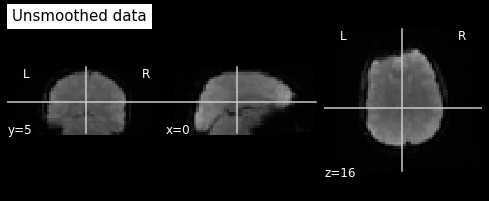

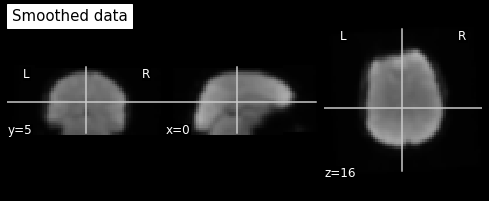

In [13]:
unsmoothed_vol = index_img(func_file, 10)
plot_anat(unsmoothed_vol, title='Unsmoothed data', cut_coords=[0, 5, 16])

smoothed_vol = index_img(smoothed_data, 10)
plot_anat(smoothed_vol, title='Smoothed data', cut_coords=[0, 5, 16])

## Excercise: Testing different smoothing kernels

Apply `smooth_img` to `func_file` using 2mm, 8mm, 10mm, and 12mm FWHM. Plot the same volume for each one and compare.